In [1]:
import pandas as pd
import numpy as np

# Load compressed CSV file directly
df = pd.read_csv('/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz', compression='gzip', low_memory=False)

# See first few rows
df.head()


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [3]:
df.isnull().any()


id                       False
member_id                 True
loan_amnt                 True
funded_amnt               True
funded_amnt_inv           True
                         ...  
settlement_status         True
settlement_date           True
settlement_amount         True
settlement_percentage     True
settlement_term           True
Length: 151, dtype: bool

In [4]:
import pandas as pd

# --- 1️⃣ Summary of missing values for all columns ---
null_summary = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Percentage (%)': (df.isnull().sum() / len(df)) * 100,
    'Data Type': df.dtypes
})

# Sort descending by percentage of missing values
null_summary = null_summary.sort_values(by='Percentage (%)', ascending=False)

# Display all columns with missing values
print("🔍 Columns with Missing Values:")
display(null_summary[null_summary['Missing Values'] > 0])

# --- 2️⃣ Check if any column has *no* missing values ---
print("\n✅ Columns with NO missing values:")
display(null_summary[null_summary['Missing Values'] == 0])

# --- 3️⃣ Get numeric and categorical columns separately ---
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("\n🔢 Numeric Columns ({} total):".format(len(numeric_cols)))
print(numeric_cols[:10], "...")  # show only first 10 for preview

print("\n🔠 Categorical Columns ({} total):".format(len(categorical_cols)))
print(categorical_cols[:10], "...")  # show only first 10 for preview


🔍 Columns with Missing Values:


,Missing Values,Percentage (%),Data Type
member_id,2260701,100.000000,float64
orig_projected_additional_accrued_interest,2252050,99.617331,float64
hardship_end_date,2249784,99.517097,object
hardship_length,2249784,99.517097,float64
hardship_loan_status,2249784,99.517097,object
...,...,...,...
loan_status,33,0.001460,object
pymnt_plan,33,0.001460,object
url,33,0.001460,object
funded_amnt,33,0.001460,float64



✅ Columns with NO missing values:


,Missing Values,Percentage (%),Data Type
id,0,0.0,object



🔢 Numeric Columns (113 total):
['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low'] ...

🔠 Categorical Columns (38 total):
['id', 'term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status'] ...


In [5]:
#rejected_df = pd.read_csv('/kaggle/input/lending-club/rejected_2007_to_2018Q4.csv.gz')
#accepted_df = pd.read_csv('/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz')

In [6]:
columns = df.columns.tolist()
print(columns)

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq',

In [7]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
datetime_cols = [col for col in df.columns if 'date' in col.lower()]

print("Numeric:", len(numeric_cols))
print("Categorical:", len(categorical_cols))
print("Date:", datetime_cols)


Numeric: 113
Categorical: 38
Date: ['hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'debt_settlement_flag_date', 'settlement_date']


In [8]:
df['issue_d'] = pd.to_datetime(df['issue_d'], errors='coerce')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors='coerce')

/tmp/ipykernel_37/371594384.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['issue_d'] = pd.to_datetime(df['issue_d'], errors='coerce')
/tmp/ipykernel_37/371594384.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors='coerce')


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


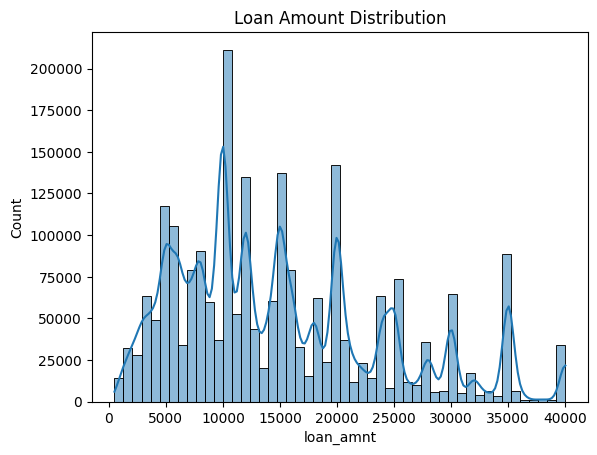

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['loan_amnt'], bins=50, kde=True)
plt.title("Loan Amount Distribution")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


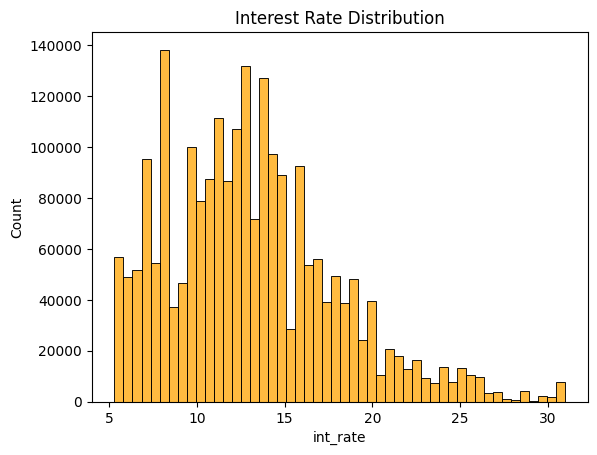

In [10]:
sns.histplot(df['int_rate'].astype(str).str.rstrip('%').astype(float), bins=50, color='orange')
plt.title("Interest Rate Distribution")
plt.show()


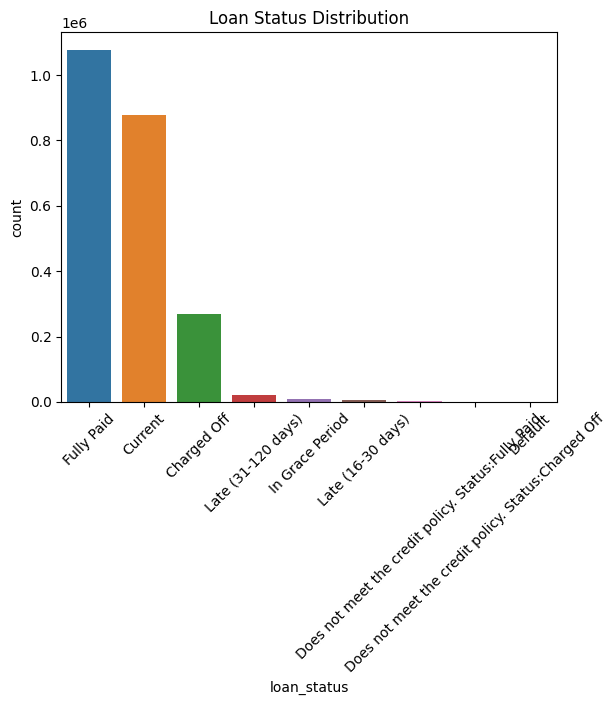

In [11]:
sns.countplot(data=df, x='loan_status', order=df['loan_status'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Loan Status Distribution")
plt.show()


In [12]:
# Compute average FICO score for each row
df['fico_mean'] = (df['fico_range_low'] + df['fico_range_high']) / 2


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


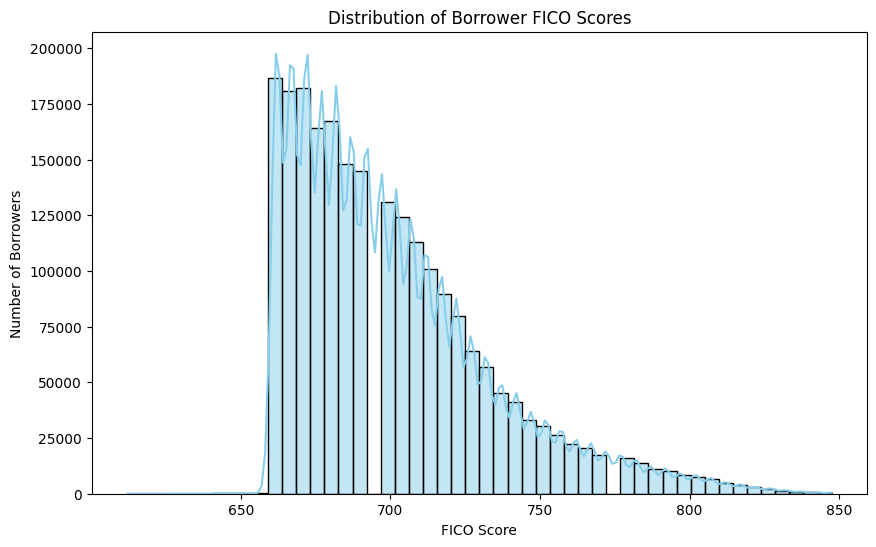

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df['fico_mean'].dropna(), bins=50, kde=True, color='skyblue')
plt.title("Distribution of Borrower FICO Scores")
plt.xlabel("FICO Score")
plt.ylabel("Number of Borrowers")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

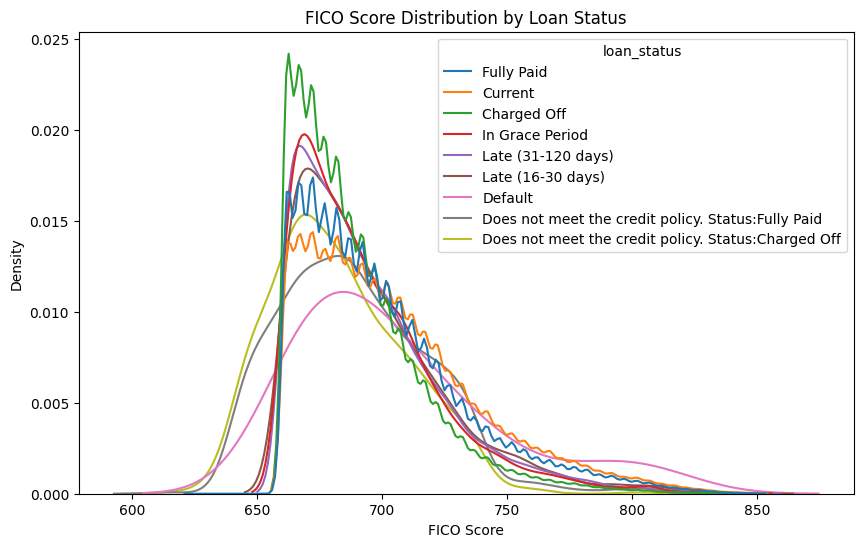

In [14]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='fico_mean', hue='loan_status', common_norm=False)
plt.title("FICO Score Distribution by Loan Status")
plt.xlabel("FICO Score")
plt.show()


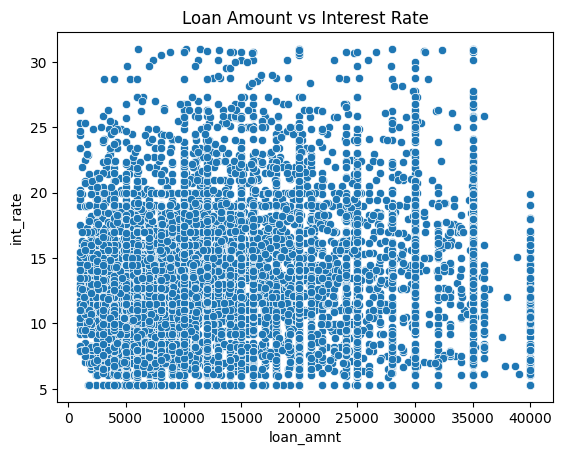

In [15]:
sns.scatterplot(x='loan_amnt', y='int_rate', data=df.sample(10000))
plt.title("Loan Amount vs Interest Rate")
plt.show()


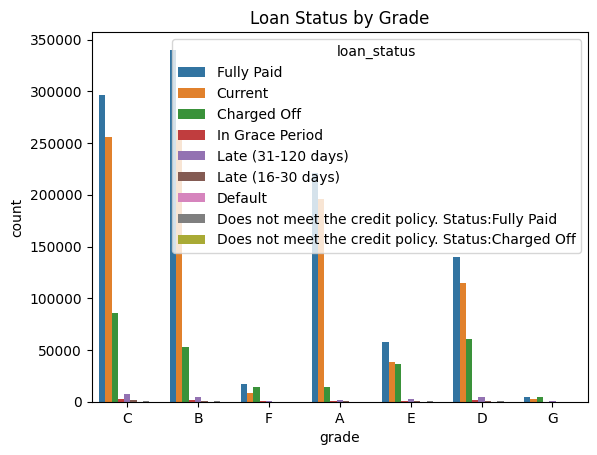

In [16]:
sns.countplot(data=df, x='grade', hue='loan_status')
plt.title("Loan Status by Grade")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

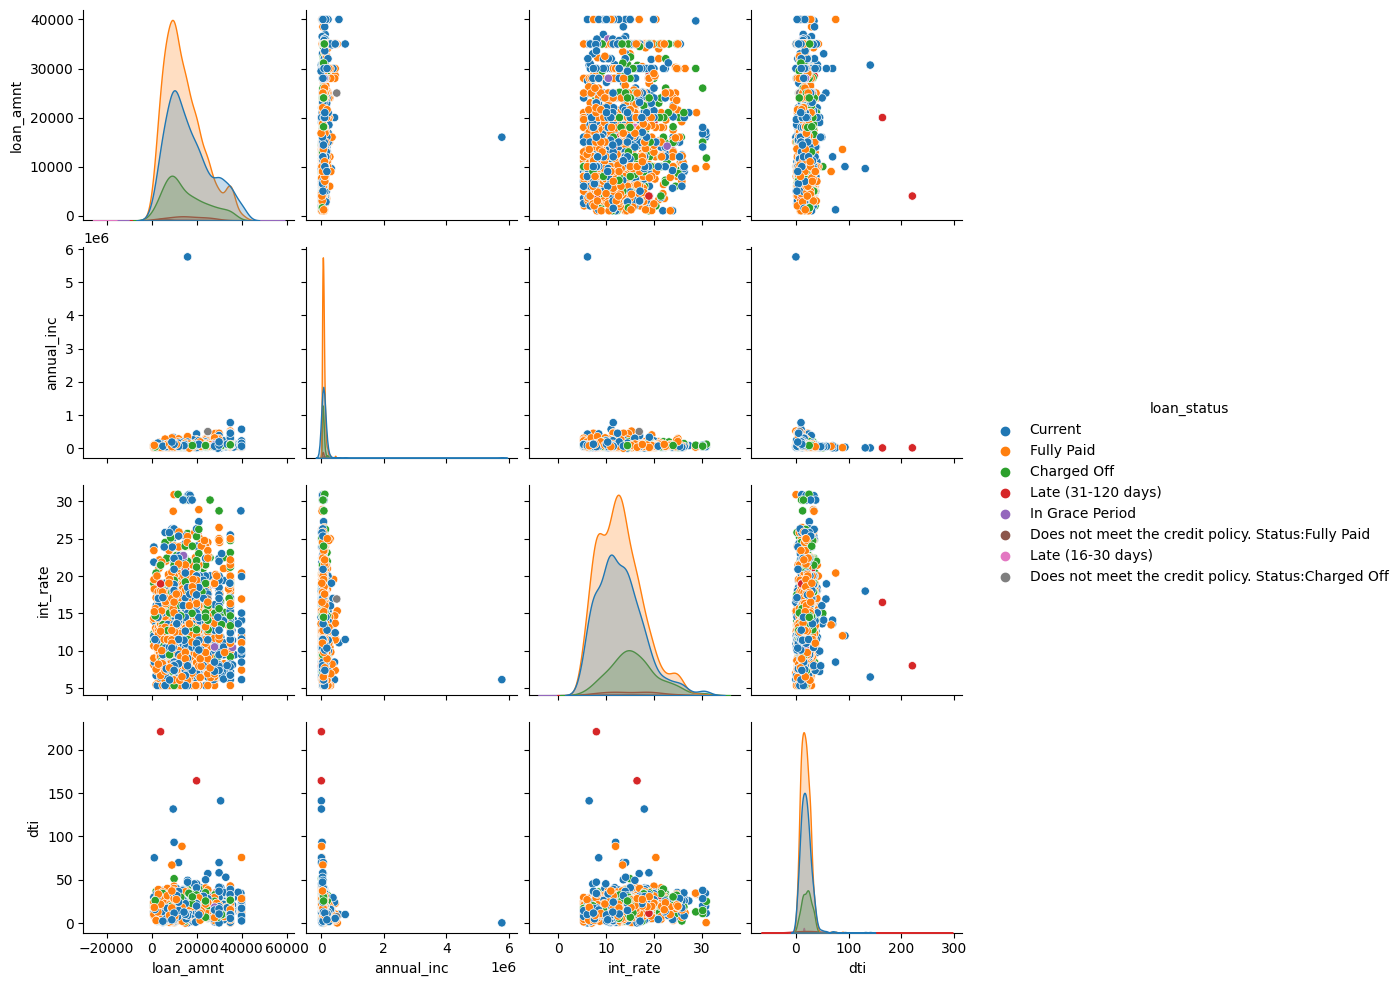

In [17]:
sns.pairplot(df.sample(2000), vars=['loan_amnt', 'annual_inc', 'int_rate', 'dti'], hue='loan_status')
plt.show()


In [18]:
fico_low = df['sec_app_fico_range_low']
annual_inc = df['annual_inc']

print("FICO Low Scores from Accepted Dataset:")
print(fico_low.head())  

print("\nAnnual Income from Accepted Dataset:")
print(annual_inc.head())


print("\nStatistics for FICO Low Scores:")
print(f"Mean: {fico_low.mean()}, Std Dev: {fico_low.std()}")  

print("\nStatistics for Annual Income:")
print(f"Mean: {annual_inc.mean()}, Std Dev: {annual_inc.std()}")

FICO Low Scores from Accepted Dataset:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: sec_app_fico_range_low, dtype: float64

Annual Income from Accepted Dataset:
0     55000.0
1     65000.0
2     63000.0
3    110000.0
4    104433.0
Name: annual_inc, dtype: float64

Statistics for FICO Low Scores:
Mean: 669.7556030771794, Std Dev: 44.72916274245376

Statistics for Annual Income:
Mean: 77992.42868706715, Std Dev: 112696.1995744867


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Correlation between FICO Low Score and Annual Income: 0.07726876095418557


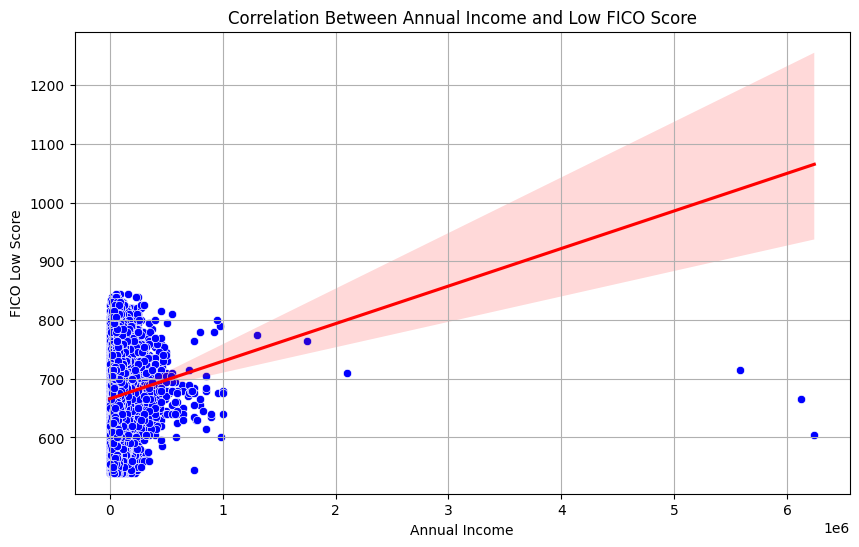

In [19]:
fico_low = df['sec_app_fico_range_low']
annual_inc = df['annual_inc']


data = pd.DataFrame({'FICO Low Score': fico_low, 'Annual Income': annual_inc})
data = data.dropna()  # Remove rows with NaN values


correlation = data['FICO Low Score'].corr(data['Annual Income'])
print(f"Correlation between FICO Low Score and Annual Income: {correlation}")


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='FICO Low Score', data=data, color='blue')
sns.regplot(x='Annual Income', y='FICO Low Score', data=data, scatter=False, color='red')

plt.title('Correlation Between Annual Income and Low FICO Score')
plt.xlabel('Annual Income')
plt.ylabel('FICO Low Score')
plt.grid(True)
plt.show()

In [20]:
# Add necessary variables
# Determining the loans that are bad from loan_status column --dependent variable (y)
# bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period",
#             "Late (16-30 days)", "Late (31-120 days)"]
# df['loan_condition_int'] = df['loan_status'].apply(lambda status: 1 if status in bad_loan else 0).astype(int)
# df['loan_condition'] = np.where(df['loan_condition_int'] == 0, 'Good Loan', 'Bad Loan')

#emp_length
emp_length_mapping = {
    '10+ years': 10,
    '9 years': 9,
    '8 years': 8,
    '7 years': 7,
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years': 3,
    '2 years': 2,
    '1 year': 1,
    '< 1 year': 0.5,
    'n/a': 0
}
df['emp_length_int'] = df['emp_length'].map(emp_length_mapping)
df.head().transpose()

# region
state_to_region = {
    'CA': 'West', 'OR': 'West', 'UT': 'West', 'WA': 'West', 'CO': 'West',
    'NV': 'West', 'AK': 'West', 'MT': 'West', 'HI': 'West', 'WY': 'West', 'ID': 'West',
    'AZ': 'SouthWest', 'TX': 'SouthWest', 'NM': 'SouthWest', 'OK': 'SouthWest',
    'GA': 'SouthEast', 'NC': 'SouthEast', 'VA': 'SouthEast', 'FL': 'SouthEast', 'KY': 'SouthEast',
    'SC': 'SouthEast', 'LA': 'SouthEast', 'AL': 'SouthEast', 'WV': 'SouthEast', 'DC': 'SouthEast',
    'AR': 'SouthEast', 'DE': 'SouthEast', 'MS': 'SouthEast', 'TN': 'SouthEast',
    'IL': 'MidWest', 'MO': 'MidWest', 'MN': 'MidWest', 'OH': 'MidWest', 'WI': 'MidWest',
    'KS': 'MidWest', 'MI': 'MidWest', 'SD': 'MidWest', 'IA': 'MidWest', 'NE': 'MidWest',
    'IN': 'MidWest', 'ND': 'MidWest',
    'CT': 'NorthEast', 'NY': 'NorthEast', 'PA': 'NorthEast', 'NJ': 'NorthEast', 'RI': 'NorthEast',
    'MA': 'NorthEast', 'MD': 'NorthEast', 'VT': 'NorthEast', 'NH': 'NorthEast', 'ME': 'NorthEast'
}
df['region'] = df['addr_state'].map(state_to_region)
df.head().transpose()

,0,1,2,3,4
id,68407277,68355089,68341763,66310712,68476807
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,3600.0,24700.0,20000.0,35000.0,10400.0
funded_amnt,3600.0,24700.0,20000.0,35000.0,10400.0
funded_amnt_inv,3600.0,24700.0,20000.0,35000.0,10400.0
...,...,...,...,...,...
settlement_percentage,NaN,NaN,NaN,NaN,NaN
settlement_term,NaN,NaN,NaN,NaN,NaN
fico_mean,677.0,717.0,697.0,787.0,697.0
emp_length_int,10.0,10.0,10.0,10.0,3.0


In [21]:
complete_df = df.sample(n=100000, random_state=42)

In [22]:
df = complete_df.dropna(subset=["loan_status"])

In [23]:
df.shape

(99996, 154)

In [24]:
df.dtypes

id                        object
member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
                          ...   
settlement_percentage    float64
settlement_term          float64
fico_mean                float64
emp_length_int           float64
region                    object
Length: 154, dtype: object

In [25]:
pd.value_counts(df.loan_status).to_frame().reset_index()

/tmp/ipykernel_37/1703991455.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df.loan_status).to_frame().reset_index()


,loan_status,count
0,Fully Paid,47460
1,Current,38887
2,Charged Off,12034
3,Late (31-120 days),969
4,In Grace Period,368
5,Late (16-30 days),187
6,Does not meet the credit policy. Status:Fully ...,60
7,Does not meet the credit policy. Status:Charge...,31


In [26]:
# Create binary target variable
df['target'] = df['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)

# Check result
df[['loan_status', 'target']].head(10)


/tmp/ipykernel_37/2938511543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)


,loan_status,target
392949,Current,1
1273506,Fully Paid,0
324024,Fully Paid,0
2066630,Fully Paid,0
477199,Current,1
1975547,Fully Paid,0
302723,Fully Paid,0
1972188,Fully Paid,0
2251549,Fully Paid,0
641990,Fully Paid,0


In [27]:
complete_df.shape

(100000, 154)

In [28]:
drop_df = df
drop_df = df[~df['loan_status'].isin(['Current', 'Issued',
                                #  'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)',
                                # 'Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off'
                                                           ])]

In [29]:
def get_missing_value_stats(input_df):
    df_null = pd.DataFrame({
        'Missing Count': input_df.isnull().sum(),
        'Missing Percent': 100 * input_df.isnull().sum() / len(input_df),
        'Type': input_df.dtypes
    })
    missing_values = df_null[df_null['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False) #改
    return missing_values

def get_value_stats(input_df):
    df_null = pd.DataFrame({
        '#Count': input_df.notna().sum(),
        '%Populated': 100 * input_df.notna().sum() / len(input_df),
        '#Unique Values':input_df.nunique(),
        'Most Common Value': input_df.mode().iloc[0],
        'Type': input_df.dtypes
    })

    missing_values = df_null[df_null['#Count'] > 0].sort_values(by='#Count', ascending=False)

    return missing_values

# Finding the the count and percentage of values that are missing.
get_missing_value_stats(drop_df)

,Missing Count,Missing Percent,Type
member_id,61109,100.000000,float64
orig_projected_additional_accrued_interest,60854,99.582713,float64
hardship_start_date,60751,99.414162,object
hardship_length,60751,99.414162,float64
hardship_end_date,60751,99.414162,object
...,...,...,...
dti,21,0.034365,float64
collections_12_mths_ex_med,2,0.003273,float64
chargeoff_within_12_mths,2,0.003273,float64
tax_liens,1,0.001636,float64


In [30]:
complete_df.shape

(100000, 154)

In [31]:
#drop any columns where over a certain percentage is missing
drop_df = drop_df.dropna(axis=1, thresh=int(0.20*len(drop_df)))
get_missing_value_stats(drop_df)

,Missing Count,Missing Percent,Type
mths_since_recent_bc_dlq,46466,76.037899,float64
mths_since_last_major_derog,44841,73.378717,float64
mths_since_recent_revol_delinq,40559,66.371566,float64
il_util,39307,64.322768,float64
mths_since_rcnt_il,36555,59.819339,float64
...,...,...,...
dti,21,0.034365,float64
collections_12_mths_ex_med,2,0.003273,float64
chargeoff_within_12_mths,2,0.003273,float64
last_credit_pull_d,1,0.001636,object


In [32]:
direct_indicators = [
    'collection_recovery_fee',
    'last_pymnt_amnt',
    'out_prncp',
    'out_prncp_inv',
    'recoveries',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_int',
    'total_rec_late_fee',
    'total_rec_prncp'
]

drop_df.drop(direct_indicators, axis=1, inplace=True)

In [33]:
#drop repeated features
# drop_df.drop(['loan_condition'], axis=1, inplace=True)
# drop_df.drop(['loan_status'], axis=1, inplace=True)
drop_df.drop(['emp_length'], axis=1, inplace=True)

drop_df.drop(['id','emp_title','url','title','zip_code'], axis=1, inplace=True)

# unique values a categorical variable (object) has
drop_df.select_dtypes(include=["object"]).nunique()  #include/exclude

term                      2
grade                     7
sub_grade                35
home_ownership            6
verification_status       3
loan_status               7
pymnt_plan                2
purpose                  14
addr_state               51
initial_list_status       2
last_pymnt_d            130
last_credit_pull_d      116
application_type          2
hardship_flag             2
disbursement_method       2
debt_settlement_flag      2
region                    5
dtype: int64

In [34]:
drop_df.shape

(61109, 99)

In [35]:
columns = drop_df.columns.tolist()
print(columns)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',

In [36]:
fillna_df = drop_df.copy()

# for object variables - Get the mode of next payment date and last payment date and the last date credit amount was pulled
for column in ["last_pymnt_d", "last_credit_pull_d"]:  #, 'income_category'
    fillna_df[column] = fillna_df.groupby("region")[column].transform(lambda x: x.fillna(x.mode()))

# for numerical variables
# Get the mode on the number of accounts in which the client is delinquent
fillna_df["pub_rec"] = fillna_df.groupby("region")["pub_rec"].transform(lambda x: x.fillna(x.median()))
# Get the mode of the total number of credit lines the borrower has
fillna_df["total_acc"] = fillna_df.groupby("region")["total_acc"].transform(lambda x: x.fillna(x.median()))

fillna_df["emp_length_int"] = fillna_df.groupby("region")["emp_length_int"].transform(lambda x: x.fillna(x.median()))

# Get the mean of the annual income depending on the region the client is located.
fillna_df["annual_inc"] = fillna_df.groupby("region")["annual_inc"].transform(lambda x: x.fillna(x.mean()))
# Mode of credit delinquencies in the past two years.
fillna_df["delinq_2yrs"] = fillna_df.groupby("region")["delinq_2yrs"].transform(lambda x: x.fillna(x.mean()))

In [37]:
# for other, fill in with zero
fillna_df.fillna(0, inplace=True)
fillna_df.isnull().sum().max() # Maximum number of nulls.

0

In [38]:
#Custom thresholds
RemoveOutlier_df = fillna_df.copy()
print("Dataset before removing outlier:",RemoveOutlier_df.shape)
RemoveOutlier_df = RemoveOutlier_df[RemoveOutlier_df['annual_inc'] <= 250000]
RemoveOutlier_df = RemoveOutlier_df[RemoveOutlier_df['dti'] <= 50]
RemoveOutlier_df = RemoveOutlier_df[RemoveOutlier_df['open_acc'] <= 40]
RemoveOutlier_df = RemoveOutlier_df[RemoveOutlier_df['total_acc'] <= 80]
RemoveOutlier_df = RemoveOutlier_df[RemoveOutlier_df['revol_util'] <= 120]
RemoveOutlier_df = RemoveOutlier_df[RemoveOutlier_df['revol_bal'] <= 250000]
RemoveOutlier_df.reset_index(drop=True, inplace=True)
print("Dataset after removing outlier:",RemoveOutlier_df.shape)

RemoveOutlier_df.head().transpose()

Dataset before removing outlier: (61109, 99)
Dataset after removing outlier: (60232, 99)


,0,1,2,3,4
loan_amnt,9600.0,4000.0,6025.0,20000.0,1000.0
funded_amnt,9600.0,4000.0,6025.0,20000.0,1000.0
funded_amnt_inv,9600.0,4000.0,6025.0,20000.0,1000.0
term,36 months,36 months,36 months,36 months,36 months
int_rate,12.99,6.68,10.91,9.49,8.18
...,...,...,...,...,...
debt_settlement_flag,N,N,N,N,N
fico_mean,687.0,782.0,742.0,697.0,682.0
emp_length_int,6.0,4.0,10.0,10.0,7.0
region,SouthEast,SouthEast,NorthEast,West,MidWest


In [39]:
TE_df = RemoveOutlier_df.copy()

In [40]:
# divide variables into numerical variables and categorical variables, categorical variables are divided into binary variables and multivariate variables
original_cols = TE_df.columns

cat_cols = TE_df.select_dtypes(include=['object']).columns.tolist()
num_cols = [col for col in TE_df.select_dtypes(exclude=['object']).columns.tolist() if col not in ['id', 'loan_condition_int']]

dual_cat_cols = [col for col in cat_cols if TE_df[col].nunique()<=2]
multi_cat_cols =[col for col in cat_cols if TE_df[col].nunique()>2]

multi_cat_cols

['grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'addr_state',
 'last_pymnt_d',
 'last_credit_pull_d',
 'region']

In [41]:
# pair all categorical features with another categorical feature
import itertools
def combine_categories(dataframe, cat_cols, expand_dim=False):
    df = dataframe.copy()
    combined = list(itertools.combinations(cat_cols, 2))
    for c1, c2 in combined:
        df.loc[:, f'{c1}__{c2}'] = df[c1].astype(str) + '_' + df[c2].astype(str)
        if expand_dim:
            cat_cols.append(f'{c1}__{c2}')
    return df, cat_cols

# binary encoding for dual_cat_cols
TE_df = pd.get_dummies(TE_df, columns=dual_cat_cols, drop_first=True)

# update dual_cat_cols
changed_columns = [col for col in TE_df.columns if col not in original_cols]
dual_cat_cols = changed_columns

TE_df.head().transpose()

,0,1,2,3,4
loan_amnt,9600.0,4000.0,6025.0,20000.0,1000.0
funded_amnt,9600.0,4000.0,6025.0,20000.0,1000.0
funded_amnt_inv,9600.0,4000.0,6025.0,20000.0,1000.0
int_rate,12.99,6.68,10.91,9.49,8.18
installment,323.42,122.93,197.0,640.57,31.42
...,...,...,...,...,...
initial_list_status_w,True,True,True,True,True
application_type_Joint App,False,False,False,False,False
hardship_flag_Y,False,False,False,False,False
disbursement_method_DirectPay,False,False,False,False,False


In [42]:
TE_df.shape

(60232, 99)

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your DataFrame
df = TE_df.copy()

# Separate features and target
X = df.drop(columns=['target'])  # replace 'target' with your actual target column name
y = df['target']

# ---------------------
# 1️⃣ First split: train + temp (val+test)
# ---------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,           # 30% for val+test
    random_state=42, 
    stratify=y               # preserves class balance
)

# ---------------------
# 3️⃣ Check shapes
# ---------------------
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (48185, 98) (48185,)
Test shape: (12047, 98) (12047,)


In [44]:
import category_encoders as ce

# Create a data set containing only multi-categorical variables
multi_cat_train_X = X_train[multi_cat_cols]
multi_cat_test_X = X_test[multi_cat_cols]

# Target encode categorical variables with smoothing method (on train set)
encoder = ce.TargetEncoder(smoothing=0.2)
encoder.fit(multi_cat_train_X, y_train)

# Apply the same encoding rules on train and test set
encoded_multi_cat_train_X = encoder.transform(multi_cat_train_X)
encoded_multi_cat_test_X = encoder.transform(multi_cat_test_X)

encoded_train_X = pd.concat([X_train.drop(columns=multi_cat_cols), encoded_multi_cat_train_X], axis=1)
encoded_test_X = pd.concat([X_test.drop(columns=multi_cat_cols), encoded_multi_cat_test_X], axis=1)

encoded_train_X.head().transpose()

,55616,31648,11099,35148,39677
loan_amnt,7500.0,26000.0,7800.0,16000.0,24375.0
funded_amnt,7500.0,26000.0,7800.0,16000.0,24375.0
funded_amnt_inv,7500.0,26000.0,7550.0,16000.0,24375.0
int_rate,18.06,17.99,8.18,9.99,20.5
installment,271.37,939.84,245.08,516.2,652.59
...,...,...,...,...,...
purpose,0.233135,0.233135,0.205336,0.233135,0.233135
addr_state,0.219512,0.255796,0.239168,0.164279,0.23494
last_pymnt_d,0.200163,0.236462,0.236486,0.206746,0.258883
last_credit_pull_d,0.12841,0.242694,0.12841,0.379642,0.781918


In [45]:
num_cols_2 = [col for col in num_cols if col != 'target']

In [46]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Recompute numeric columns but exclude datetime
num_cols_2 = [
    col for col in encoded_train_X.select_dtypes(include=['number']).columns
    if col != 'target'
]

# Double-check if any datetime columns accidentally got included
datetime_cols = encoded_train_X.select_dtypes(include=['datetime64']).columns.tolist()
print("Datetime columns:", datetime_cols)

# Drop any datetime columns that sneaked in
num_cols_2 = [col for col in num_cols_2 if col not in datetime_cols]

# Now safely scale numeric columns
scaler = StandardScaler()

standardized_train_X = encoded_train_X.copy()
standardized_train_X[num_cols_2] = scaler.fit_transform(encoded_train_X[num_cols_2])

standardized_test_X = encoded_test_X.copy()
standardized_test_X[num_cols_2] = scaler.transform(encoded_test_X[num_cols_2])

print("✅ Scaling successful!")


Datetime columns: ['issue_d', 'earliest_cr_line']
✅ Scaling successful!


In [47]:
# Check which columns are non-numeric
non_numeric_cols = standardized_train_X.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", list(non_numeric_cols))


Non-numeric columns: ['issue_d', 'earliest_cr_line', 'term_ 60 months', 'pymnt_plan_y', 'initial_list_status_w', 'application_type_Joint App', 'hardship_flag_Y', 'disbursement_method_DirectPay', 'debt_settlement_flag_Y']


In [48]:
# ✅ Keep only numeric columns
numeric_train_X = standardized_train_X.select_dtypes(include=[np.number])
numeric_test_X = standardized_test_X.select_dtypes(include=[np.number])

print("Numeric columns count:", len(numeric_train_X.columns))


Numeric columns count: 89


In [49]:
import torch

X_train_tensor = torch.tensor(numeric_train_X.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(numeric_test_X.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


In [50]:
from torch.utils.data import TensorDataset, DataLoader

train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)


In [51]:
import torch.nn as nn
from sklearn.metrics import roc_auc_score, f1_score

class NumericMLP(nn.Module):
    def __init__(self, input_dim):
        super(NumericMLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)

# Initialize model
input_dim = X_train_tensor.shape[1]
model = NumericMLP(input_dim)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


In [52]:
epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        preds = model(X_batch)
        loss = criterion(preds, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {total_loss/len(train_loader):.4f}")


Epoch [1/10] - Loss: 0.0422
Epoch [2/10] - Loss: 0.0055
Epoch [3/10] - Loss: 0.0017
Epoch [4/10] - Loss: 0.0006
Epoch [5/10] - Loss: 0.0004
Epoch [6/10] - Loss: 0.0010
Epoch [7/10] - Loss: 0.0012
Epoch [8/10] - Loss: 0.0004
Epoch [9/10] - Loss: 0.0002
Epoch [10/10] - Loss: 0.0000


In [53]:
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        preds = model(X_batch).numpy().flatten()
        all_preds.extend(preds)
        all_labels.extend(y_batch.numpy().flatten())

auc = roc_auc_score(all_labels, all_preds)
f1 = f1_score(all_labels, [1 if p > 0.5 else 0 for p in all_preds])

print(f"\n Test AUC: {auc:.4f}")
print(f" Test F1-score: {f1:.4f}")



 Test AUC: 1.0000
 Test F1-score: 0.9998


In [55]:
!pip install d3rlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 14.5 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.1/201.1 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.1 MB/s eta 0:00:000:

In [56]:
# ============================================
# 📘 Offline RL: Loan Approval Decision-Making
# ============================================

import torch
import numpy as np
import pandas as pd
import d3rlpy
from d3rlpy.datasets import MDPDataset
from d3rlpy.algos import DiscreteCQLConfig
from tqdm import tqdm

# ------------------------------------------------
# ✅ 1️⃣  Prepare Data (Placeholders)
# ------------------------------------------------

X_train_tensor = torch.randn(1000, 10)
y_train_tensor = torch.randint(0, 2, (1000, 1))
X_test_tensor = torch.randn(500, 10)
y_test_tensor = torch.randint(0, 2, (500, 1))

X_train = X_train_tensor.numpy()
y_train = y_train_tensor.numpy().ravel()
X_test = X_test_tensor.numpy()
y_test = y_test_tensor.numpy().ravel()

# ------------------------------------------------
# ✅ 2️⃣  Define Actions and Rewards
# ------------------------------------------------

np.random.seed(42)
n_train = len(X_train)
n_test = len(X_test)

loan_amnt_train = np.random.uniform(5000, 30000, size=n_train)
loan_amnt_test = np.random.uniform(5000, 30000, size=n_test)
interest_rate_train = np.random.uniform(0.05, 0.25, size=n_train)
interest_rate_test = np.random.uniform(0.05, 0.25, size=n_test)

def compute_reward(action, y, loan_amnt, int_rate):
    reward = np.where(
        action == 1,
        np.where(y == 0, loan_amnt * int_rate, -loan_amnt),
        0
    )
    return reward

# ------------------------------------------------
# ✅ 3️⃣  Create Offline Dataset for RL
# ------------------------------------------------

behavior_actions_train = np.random.choice([0, 1], size=n_train, p=[0.3, 0.7])
behavior_rewards_train = compute_reward(
    behavior_actions_train, y_train, loan_amnt_train, interest_rate_train
)

terminals_train = np.zeros_like(behavior_rewards_train, dtype=bool)
terminals_train[-1] = True

train_dataset = MDPDataset(
    observations=X_train,
    actions=behavior_actions_train,
    rewards=behavior_rewards_train,
    terminals=terminals_train
)

# ------------------------------------------------
# ✅ 4️⃣  Train Offline RL Agent (DiscreteCQL)
# ------------------------------------------------

cql_config = DiscreteCQLConfig(alpha=20.0)

device = "cuda" if torch.cuda.is_available() else "cpu"
cql = cql_config.create(device=device)

# CORRECTION: The `fit` method now uses `n_steps` and `n_steps_per_epoch`.
cql.fit(
    train_dataset,
    n_steps=50000,
    n_steps_per_epoch=5000
)

# ------------------------------------------------
# ✅ 5️⃣  Evaluate the Learned Policy
# ------------------------------------------------

rl_actions = []
for obs in tqdm(X_test, desc="Evaluating RL Policy"):
    action = cql.predict(np.expand_dims(obs, axis=0))
    rl_actions.append(action[0])

rl_rewards = compute_reward(np.array(rl_actions), y_test, loan_amnt_test, interest_rate_test)
avg_reward = np.mean(rl_rewards)
total_reward = np.sum(rl_rewards)

print(f"\nEstimated Policy Value (Average Reward): {avg_reward:.2f}")
print(f"Total Estimated Profit/Loss: {total_reward:.2f}")

# ------------------------------------------------
# ✅ 6️⃣  Compare RL vs Simple Threshold Policy (Baseline)
# ------------------------------------------------

predicted_risk = np.random.rand(len(y_test))
dl_actions = (predicted_risk < 0.5).astype(int)
dl_rewards = compute_reward(dl_actions, y_test, loan_amnt_test, interest_rate_test)
print(f"Baseline (DL) Average Reward: {np.mean(dl_rewards):.2f}")

# ------------------------------------------------
# ✅ 7️⃣  Analyze Policy Differences
# ------------------------------------------------

comparison_df = pd.DataFrame({
    "DL_Action": dl_actions,
    "RL_Action": rl_actions,
    "Loan_Amount": loan_amnt_test,
    "Interest_Rate": interest_rate_test,
    "True_Status": y_test,
    "RL_Reward": rl_rewards,
    "DL_Reward": dl_rewards
})

disagreement_cases = comparison_df[comparison_df["DL_Action"] != comparison_df["RL_Action"]]
print(f"\nDisagreement count: {len(disagreement_cases)}")
print("Disagreement Cases:")
print(disagreement_cases.head())

# ------------------------------------------------
# ✅ 8️⃣  Save Model
# ------------------------------------------------

cql.save("loan_approval_rl_model.d3")
print("\nRL model saved as loan_approval_rl_model.d3")



2025-10-26 11:22.29 [info     ] Register Shimmy environments. 
2025-10-26 11:22.29 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('int64')], shape=[(1,)]) observation_signature=Signature(dtype=[dtype('float32')], shape=[(10,)]) reward_signature=Signature(dtype=[dtype('float64')], shape=[(1,)])
2025-10-26 11:22.29 [info     ] Action-space has been automatically determined. action_space=<ActionSpace.DISCRETE: 2>
2025-10-26 11:22.29 [info     ] Action size has been automatically determined. action_size=2
2025-10-26 11:22.29 [info     ] dataset info                   dataset_info=DatasetInfo(observation_signature=Signature(dtype=[dtype('float32')], shape=[(10,)]), action_signature=Signature(dtype=[dtype('int64')], shape=[(1,)]), reward_signature=Signature(dtype=[dtype('float64')], shape=[(1,)]), action_space=<ActionSpace.DISCRETE: 2>, action_size=2)
2025-10-26 11:22.29 [debug    ] Building models...            
2025-10-26 11:22.29 [debug 

Epoch 1/10:   0%|          | 0/5000 [00:00<?, ?it/s]

2025-10-26 11:22.53 [info     ] DiscreteCQL_20251026112229: epoch=1 step=5000 epoch=1 metrics={'time_sample_batch': 0.0005193236827850342, 'time_algorithm_update': 0.004193945169448853, 'loss': 6736.639477050781, 'td_loss': 6726.614939770508, 'conservative_loss': 0.5012269307047129, 'time_step': 0.0048034878253936765} step=5000
2025-10-26 11:22.53 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20251026112229/model_5000.d3


Epoch 2/10:   0%|          | 0/5000 [00:00<?, ?it/s]

2025-10-26 11:23.16 [info     ] DiscreteCQL_20251026112229: epoch=2 step=10000 epoch=2 metrics={'time_sample_batch': 0.000515149450302124, 'time_algorithm_update': 0.004009360074996948, 'loss': 6705.570709570313, 'td_loss': 6700.5271112060545, 'conservative_loss': 0.25217990156412123, 'time_step': 0.004612986516952515} step=10000
2025-10-26 11:23.16 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20251026112229/model_10000.d3


Epoch 3/10:   0%|          | 0/5000 [00:00<?, ?it/s]

2025-10-26 11:23.40 [info     ] DiscreteCQL_20251026112229: epoch=3 step=15000 epoch=3 metrics={'time_sample_batch': 0.0005181402683258056, 'time_algorithm_update': 0.00402412691116333, 'loss': 6686.49894194336, 'td_loss': 6684.667530859375, 'conservative_loss': 0.09157057259827853, 'time_step': 0.004632261228561401} step=15000
2025-10-26 11:23.40 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20251026112229/model_15000.d3


Epoch 4/10:   0%|          | 0/5000 [00:00<?, ?it/s]

2025-10-26 11:24.03 [info     ] DiscreteCQL_20251026112229: epoch=4 step=20000 epoch=4 metrics={'time_sample_batch': 0.0005121674060821534, 'time_algorithm_update': 0.004010662078857422, 'loss': 6716.460667919921, 'td_loss': 6715.927093994141, 'conservative_loss': 0.026678738013003023, 'time_step': 0.004612079191207886} step=20000
2025-10-26 11:24.03 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20251026112229/model_20000.d3


Epoch 5/10:   0%|          | 0/5000 [00:00<?, ?it/s]

2025-10-26 11:24.26 [info     ] DiscreteCQL_20251026112229: epoch=5 step=25000 epoch=5 metrics={'time_sample_batch': 0.0005065328121185303, 'time_algorithm_update': 0.0039733152866363525, 'loss': 6753.101725878906, 'td_loss': 6752.85206640625, 'conservative_loss': 0.012483189791999758, 'time_step': 0.004565102481842041} step=25000
2025-10-26 11:24.26 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20251026112229/model_25000.d3


Epoch 6/10:   0%|          | 0/5000 [00:00<?, ?it/s]

2025-10-26 11:24.49 [info     ] DiscreteCQL_20251026112229: epoch=6 step=30000 epoch=6 metrics={'time_sample_batch': 0.0005104537963867187, 'time_algorithm_update': 0.004040783023834229, 'loss': 6709.892339550781, 'td_loss': 6709.675201953125, 'conservative_loss': 0.01085702657205984, 'time_step': 0.004638173246383667} step=30000
2025-10-26 11:24.49 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20251026112229/model_30000.d3


Epoch 7/10:   0%|          | 0/5000 [00:00<?, ?it/s]

2025-10-26 11:25.12 [info     ] DiscreteCQL_20251026112229: epoch=7 step=35000 epoch=7 metrics={'time_sample_batch': 0.0005049464702606201, 'time_algorithm_update': 0.003979633474349976, 'loss': 6697.336183666992, 'td_loss': 6697.120370263672, 'conservative_loss': 0.01079079278348945, 'time_step': 0.0045698997497558595} step=35000
2025-10-26 11:25.12 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20251026112229/model_35000.d3


Epoch 8/10:   0%|          | 0/5000 [00:00<?, ?it/s]

2025-10-26 11:25.35 [info     ] DiscreteCQL_20251026112229: epoch=8 step=40000 epoch=8 metrics={'time_sample_batch': 0.0005081319332122802, 'time_algorithm_update': 0.004001004695892334, 'loss': 6702.459550683594, 'td_loss': 6702.229528808593, 'conservative_loss': 0.011501147699588909, 'time_step': 0.004594549036026001} step=40000
2025-10-26 11:25.35 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20251026112229/model_40000.d3


Epoch 9/10:   0%|          | 0/5000 [00:00<?, ?it/s]

2025-10-26 11:25.59 [info     ] DiscreteCQL_20251026112229: epoch=9 step=45000 epoch=9 metrics={'time_sample_batch': 0.0005115985393524169, 'time_algorithm_update': 0.00401276445388794, 'loss': 6698.4289933105465, 'td_loss': 6698.196797607422, 'conservative_loss': 0.011609871486714109, 'time_step': 0.004610727453231812} step=45000
2025-10-26 11:25.59 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20251026112229/model_45000.d3


Epoch 10/10:   0%|          | 0/5000 [00:00<?, ?it/s]

2025-10-26 11:26.22 [info     ] DiscreteCQL_20251026112229: epoch=10 step=50000 epoch=10 metrics={'time_sample_batch': 0.0005085780620574951, 'time_algorithm_update': 0.0039945992946624756, 'loss': 6707.772310449219, 'td_loss': 6707.52379477539, 'conservative_loss': 0.012425676581636071, 'time_step': 0.004589137649536132} step=50000
2025-10-26 11:26.22 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20251026112229/model_50000.d3


Evaluating RL Policy: 100%|██████████| 500/500 [00:00<00:00, 2759.61it/s]


Estimated Policy Value (Average Reward): -5219.38
Total Estimated Profit/Loss: -2609692.14
Baseline (DL) Average Reward: -3846.49

Disagreement count: 251
Disagreement Cases:
   DL_Action  RL_Action   Loan_Amount  Interest_Rate  True_Status  \
0          1          0   9628.323221       0.215504            1   
1          1          0  18547.523684       0.202906            1   
2          0          1  26823.645897       0.164706            1   
6          0          1  22306.914113       0.220792            1   
8          0          1  11241.700221       0.219394            0   

      RL_Reward     DL_Reward  
0      0.000000  -9628.323221  
1      0.000000 -18547.523684  
2 -26823.645897      0.000000  
6 -22306.914113      0.000000  
8   2466.359002      0.000000  

RL model saved as loan_approval_rl_model.d3
